**PART A**

In [ ]:
#importing all necessary libraries
import cv2
import numpy as np
from sympy import symbols, Eq, solve
from google.colab.patches import cv2_imshow
from IPython.display import clear_output
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
import dlib

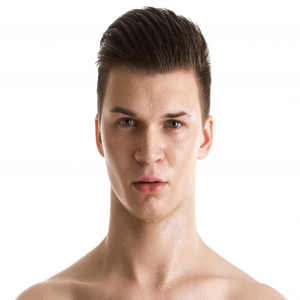

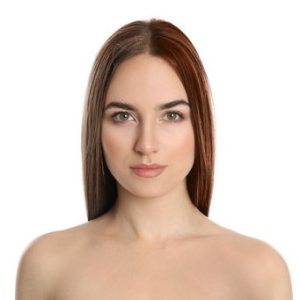

In [ ]:
#Reading a image from google drive

image1 = cv2.imread("photo1.jpg")
image2 = cv2.imread("photo2.jpg")
img1 = image1
img2 = image2
if image1.shape != image2.shape:
  height = 300
  width = 300
  img1 = cv2.resize(image1,(height,width))
  img2 = cv2.resize(image2,(height,width))
# img1 = cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
# img2 = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)
#displaying images
cv2_imshow(img1)
cv2_imshow(img2)

['129', '151', '128', '163']
['107', '111', '104', '119']
['120', '137', '119', '149']
['119', '113', '118', '121']


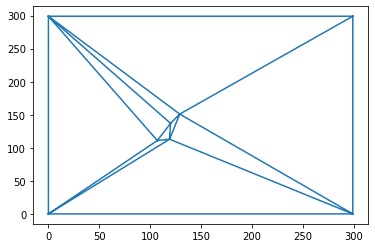

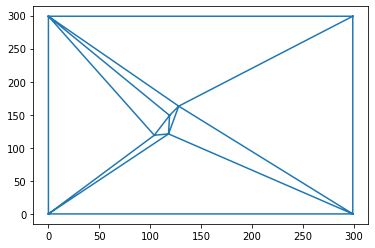

In [ ]:
#Reading file from user for tie points

point_count = 0
flag = 0
points1 = []
points2 = []


with open("/content/drive/MyDrive/DIP/tileponts.txt", "r") as file:
    data = file.readlines()
    for line in data:
      if flag == 0:
        point_count = int(line)
        flag = 1
      else:
        s = line.split()
        print(s)
        points1.append((int(s[0]),int(s[1])))
        points2.append((int(s[2]),int(s[3])))


points1.append([0,0])
points1.append([0,width-1])
points1.append([height-1,0])
points1.append([height-1,width-1])

points2.append([0,0])
points2.append([0,width-1])
points2.append([height-1,0])
points2.append([height-1,width-1])

points_img1 = np.array(points1)
points_img2 = np.array(points2)


tri = Delaunay(points1)
triangles_img1 = tri.simplices

plt.triplot(points_img1[:,0], points_img1[:,1], tri.simplices)
plt.show()

plt.triplot(points_img2[:,0], points_img2[:,1], tri.simplices)
plt.show()

In [ ]:
#fuction to transform image
def affinetransform(image, srcTri, dstTri, size) :
    height = size[0]
    width = size[1]
    M = cv2.getAffineTransform(np.float32(srcTri), np.float32(dstTri))
    dst = cv2.warpAffine(image, M, (height, width), None, flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT_101)
    return dst

#warping a traingle into another triangle
def warp_triangle(img1, img2, img, t1, t2, t, alpha) :
    r = cv2.boundingRect(np.float32([t]))
    r1 = cv2.boundingRect(np.float32([t1]))
    r2 = cv2.boundingRect(np.float32([t2]))

    tRect = []
    t1Rect = []
    t2Rect = []


    for i in range(0, 3):
        tRect.append(((t[i][0] - r[0]),(t[i][1] - r[1])))
        t1Rect.append(((t1[i][0] - r1[0]),(t1[i][1] - r1[1])))
        t2Rect.append(((t2[i][0] - r2[0]),(t2[i][1] - r2[1])))

    mask = np.zeros((r[3], r[2], 3), dtype = np.float32)
    cv2.fillConvexPoly(mask, np.int32(tRect), (1.0, 1.0, 1.0), 16, 0)


    img1Rect = img1[r1[1]:r1[1] + r1[3], r1[0]:r1[0] + r1[2]]
    img2Rect = img2[r2[1]:r2[1] + r2[3], r2[0]:r2[0] + r2[2]]

    size = (r[2], r[3])
    warpimage1 = affinetransform(img1Rect, t1Rect, tRect, size)
    warpimage2 = affinetransform(img2Rect, t2Rect, tRect, size)

    imgRect = (1.0 - alpha) * warpimage1 + alpha * warpimage2

    img[r[1]:r[1]+r[3], r[0]:r[0]+r[2]] = img[r[1]:r[1]+r[3], r[0]:r[0]+r[2]] * ( 1 - mask ) + imgRect * mask

#calculate intermediate images
def calculate_i_images(img1,img2,points1,points2,tri_list):
    i_image_list = []
    image_count = 40
    for m in range(0, image_count):
        alpha = m/image_count
        points = []

        for i in range(0, len(points1)):
            x = (1 - alpha) * points1[i][0] + alpha * points2[i][0]
            y = (1 - alpha) * points1[i][1] + alpha * points2[i][1]
            points.append((x,y))

        intermediate_image = np.zeros(img1.shape, dtype = img1.dtype)

        for i in range(len(tri_list)):
            x = int(tri_list[i][0])
            y = int(tri_list[i][1])
            z = int(tri_list[i][2])

            t1 = [points1[x], points1[y], points1[z]]
            t2 = [points2[x], points2[y], points2[z]]
            t = [points[x], points[y], points[z]]

            warp_triangle(img1, img2, intermediate_image, t1, t2, t, alpha)
        cv2_imshow(intermediate_image)
        i_image_list.append(intermediate_image)
    return i_image_list

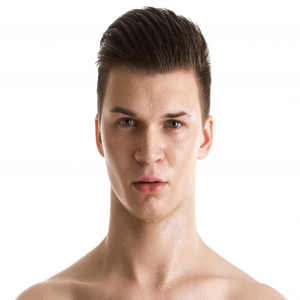

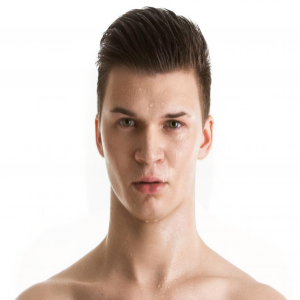

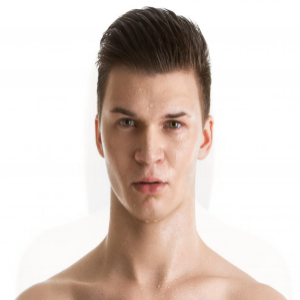

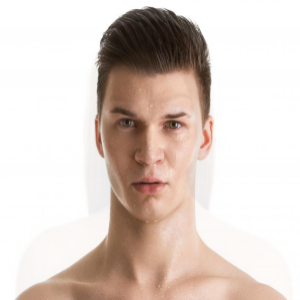

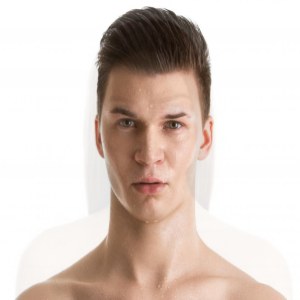

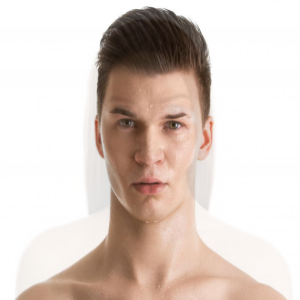

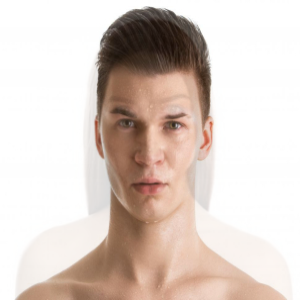

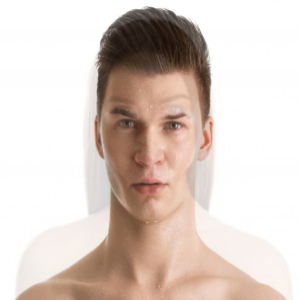

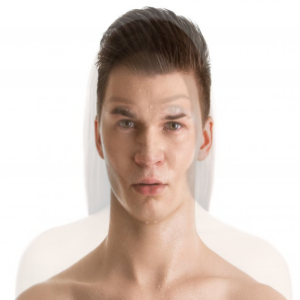

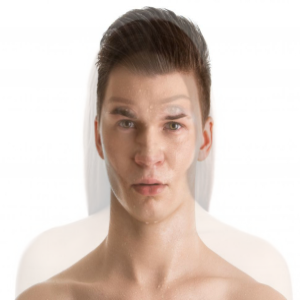

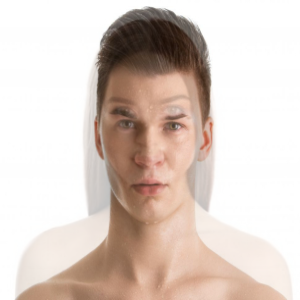

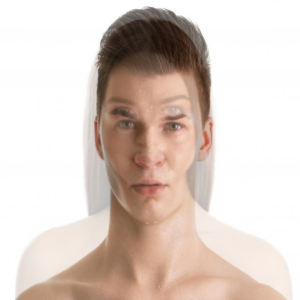

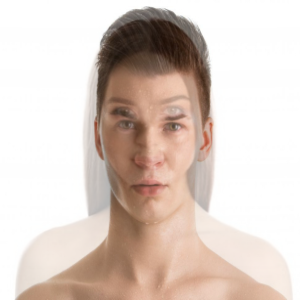

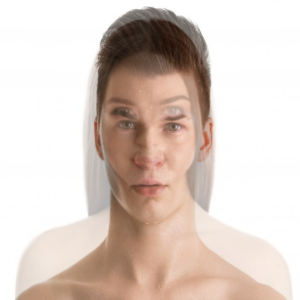

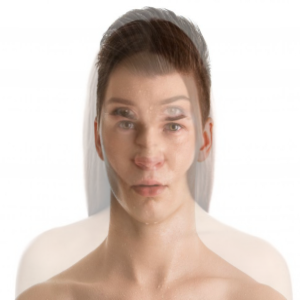

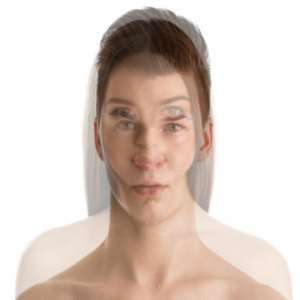

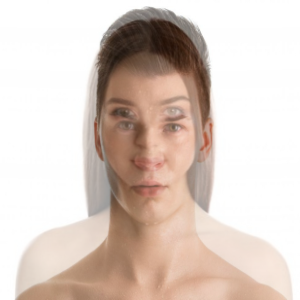

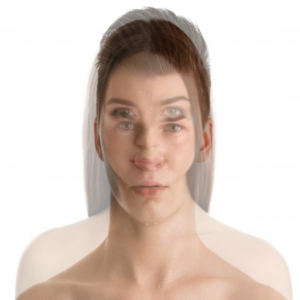

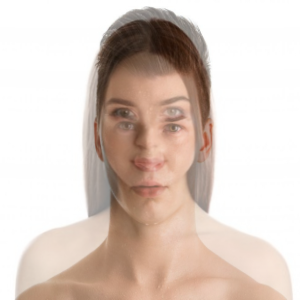

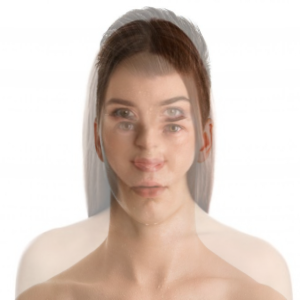

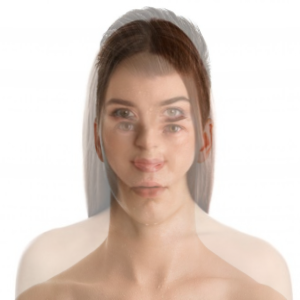

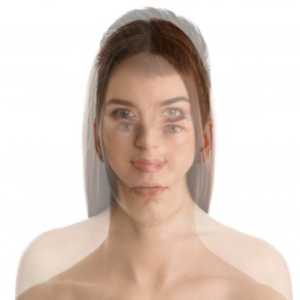

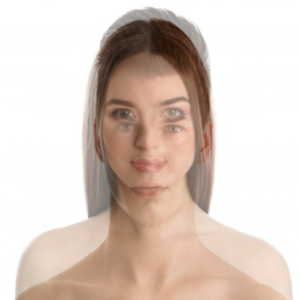

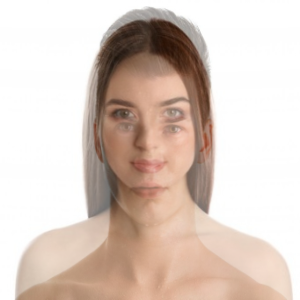

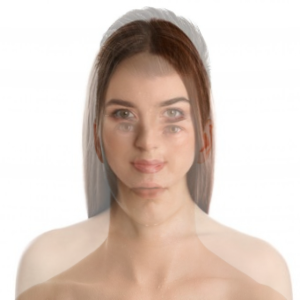

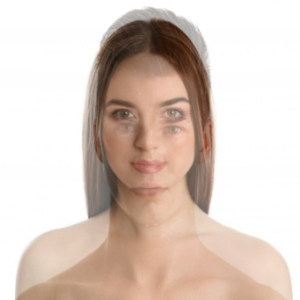

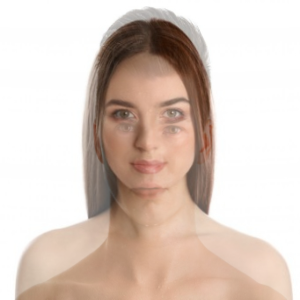

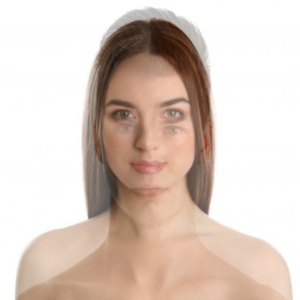

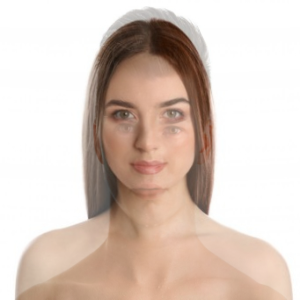

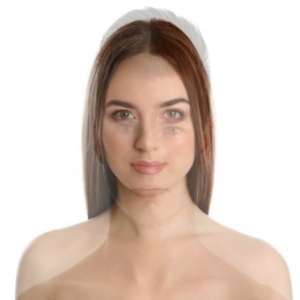

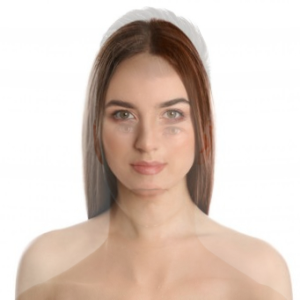

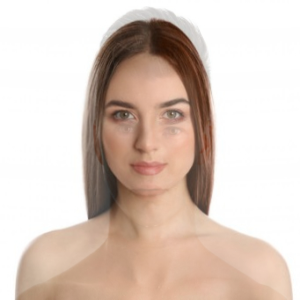

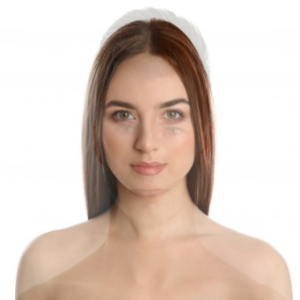

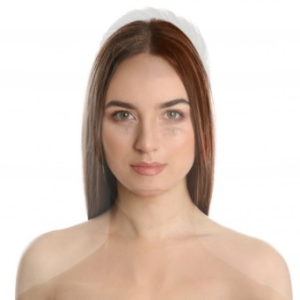

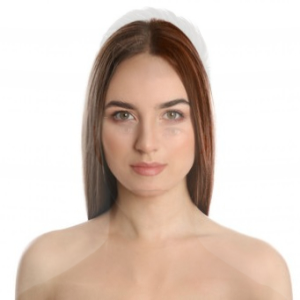

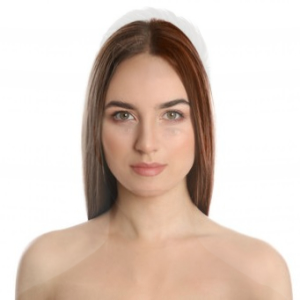

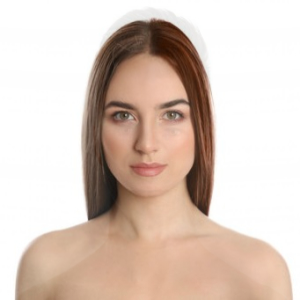

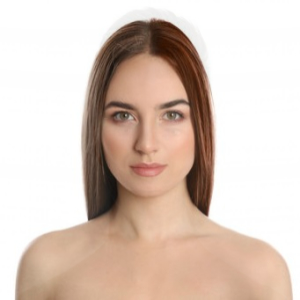

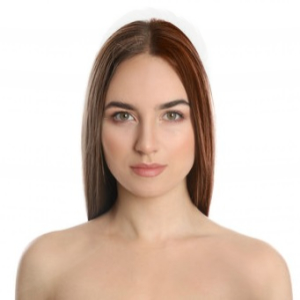

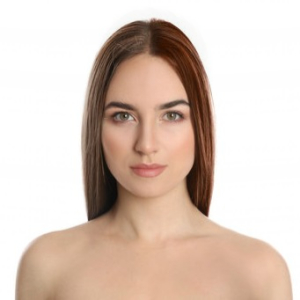

In [ ]:
#getting size of input image
size = (img1.shape[0],img1.shape[1])
#calling calculate intermediate images function which returns list of 40 intermediate images
i_image_list = calculate_i_images(img1,img2,points_img1,points_img2,triangles_img1)


In [ ]:
#Creating GIF image from list of images

import glob
from PIL import Image

frames = []
for i in range(len(i_image_list)):
  image_rgb = cv2.cvtColor(i_image_list[i], cv2.COLOR_BGR2RGB)
  frames.append(Image.fromarray(image_rgb))

frame_one = frames[0]
frame_one.save("UserTiePoints.gif", format="GIF", append_images=frames,save_all=True, duration=100, loop=0)

**PART B**

In [ ]:
#importing all necessary libraries
import cv2
import numpy as np
from sympy import symbols, Eq, solve
from google.colab.patches import cv2_imshow
from IPython.display import clear_output
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
import dlib

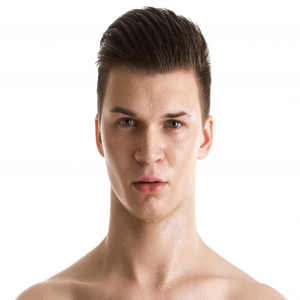

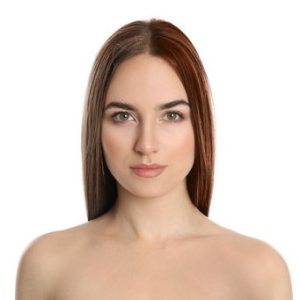

In [ ]:
#Reading a image from google drive

image1 = cv2.imread("/content/drive/MyDrive/DIP/photo1.jpg")
image2 = cv2.imread("/content/drive/MyDrive/DIP/photo2.jpg")

img1 = image1
img2 = image2
if image1.shape != image2.shape:
  height = 300
  width = 300
  img1 = cv2.resize(image1,(height,width))
  img2 = cv2.resize(image2,(height,width))

# img1 = cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
# img2 = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)
#displaying images
cv2_imshow(img1)
cv2_imshow(img2)

In [ ]:
# a function to get tile points of image and getting triangulations on image

def get_tile_points(image):
  detector = dlib.get_frontal_face_detector()
  predictor = dlib.shape_predictor("/content/drive/MyDrive/DIP/data")
  faces = detector(image)
  landmarks = predictor(image, faces[0])
  points = []
  for n in range(0, 68):
      x = landmarks.part(n).x
      y = landmarks.part(n).y
      points.append([x,y])
      #cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

# Display the image
  cv2_imshow(image)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

  points.append([0,0])
  points.append([0,width-1])
  points.append([height-1,0])
  points.append([height-1,width-1])
  points = np.array(points)



  tri = Delaunay(points)
  plt.triplot(points[:,0], points[:,1], tri.simplices)
  #plt.plot(points[:,1], points[:,0])
  plt.show()
  return tri.simplices,points

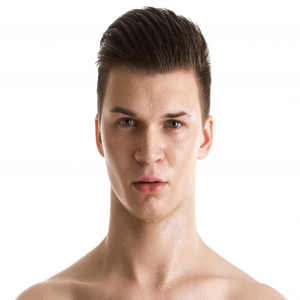

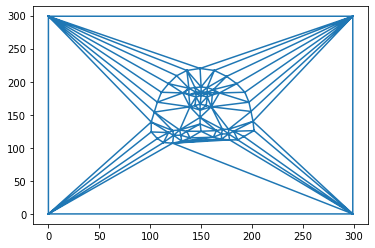

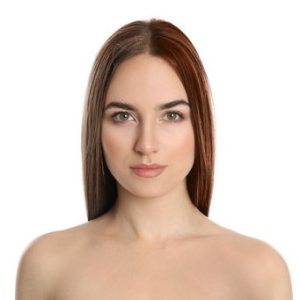

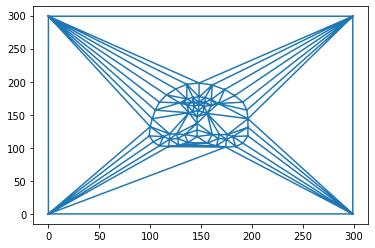

(72, 2)
(72, 2)


In [ ]:
#getting triangles and tie points of image 1
triangles_img1,points_img1 = get_tile_points(img1)

#getting triangles and tie points of image 2

tri_img2,points_img2 = get_tile_points(img2)

#triangles_img2 = np.zeros(triangles_img1.shape)

print(points_img1.shape)
print(points_img2.shape)
#print(triangles_img1.shape)

In [ ]:
#fuction to transform image
def affinetransform(image, srcTri, dstTri, size) :
    height = size[0]
    width = size[1]
    M = cv2.getAffineTransform(np.float32(srcTri), np.float32(dstTri))
    dst = cv2.warpAffine(image, M, (height, width), None, flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT_101)
    return dst

#warping a traingle into another triangle
def warp_triangle(img1, img2, img, t1, t2, t, alpha) :
    r = cv2.boundingRect(np.float32([t]))
    r1 = cv2.boundingRect(np.float32([t1]))
    r2 = cv2.boundingRect(np.float32([t2]))

    tRect = []
    t1Rect = []
    t2Rect = []


    for i in range(0, 3):
        tRect.append(((t[i][0] - r[0]),(t[i][1] - r[1])))
        t1Rect.append(((t1[i][0] - r1[0]),(t1[i][1] - r1[1])))
        t2Rect.append(((t2[i][0] - r2[0]),(t2[i][1] - r2[1])))

    mask = np.zeros((r[3], r[2], 3), dtype = np.float32)
    cv2.fillConvexPoly(mask, np.int32(tRect), (1.0, 1.0, 1.0), 16, 0)


    img1Rect = img1[r1[1]:r1[1] + r1[3], r1[0]:r1[0] + r1[2]]
    img2Rect = img2[r2[1]:r2[1] + r2[3], r2[0]:r2[0] + r2[2]]

    size = (r[2], r[3])
    warpimage1 = affinetransform(img1Rect, t1Rect, tRect, size)
    warpimage2 = affinetransform(img2Rect, t2Rect, tRect, size)

    imgRect = (1.0 - alpha) * warpimage1 + alpha * warpimage2

    img[r[1]:r[1]+r[3], r[0]:r[0]+r[2]] = img[r[1]:r[1]+r[3], r[0]:r[0]+r[2]] * ( 1 - mask ) + imgRect * mask

#calculating intermediate images
def calculate_i_images(img1,img2,points1,points2,tri_list):
    i_image_list = []
    image_count = 40
    for m in range(0, image_count):
        alpha = m/image_count
        points = []

        for i in range(0, len(points1)):
            x = (1 - alpha) * points1[i][0] + alpha * points2[i][0]
            y = (1 - alpha) * points1[i][1] + alpha * points2[i][1]
            points.append((x,y))

        intermediate_image = np.zeros(img1.shape, dtype = img1.dtype)

        for i in range(len(tri_list)):
            x = int(tri_list[i][0])
            y = int(tri_list[i][1])
            z = int(tri_list[i][2])

            t1 = [points1[x], points1[y], points1[z]]
            t2 = [points2[x], points2[y], points2[z]]
            t = [points[x], points[y], points[z]]

            warp_triangle(img1, img2, intermediate_image, t1, t2, t, alpha)
        cv2_imshow(intermediate_image)
        i_image_list.append(intermediate_image)
    return i_image_list

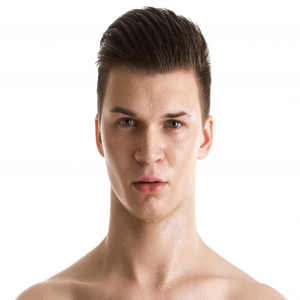

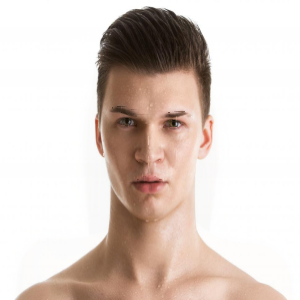

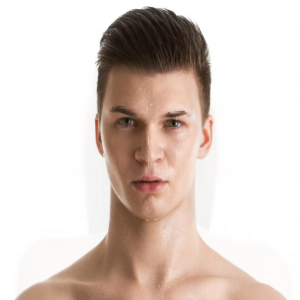

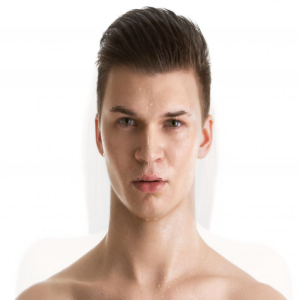

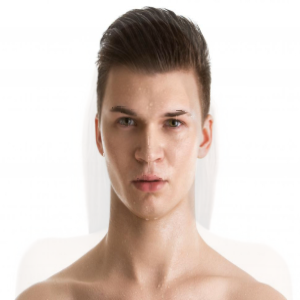

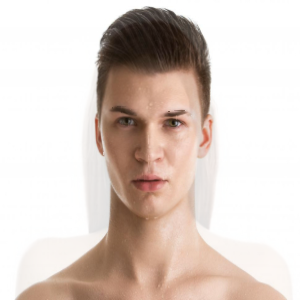

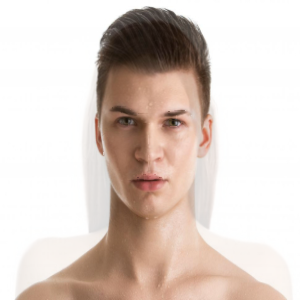

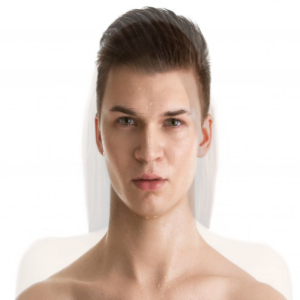

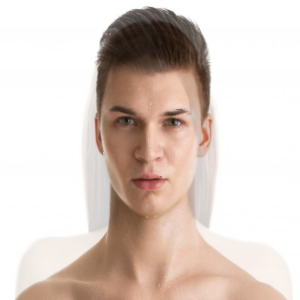

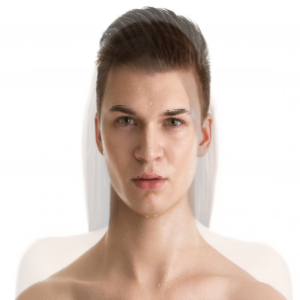

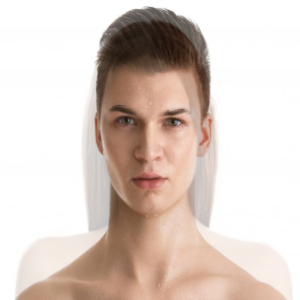

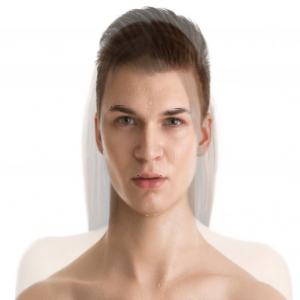

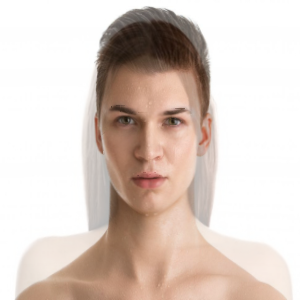

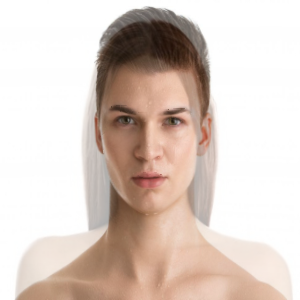

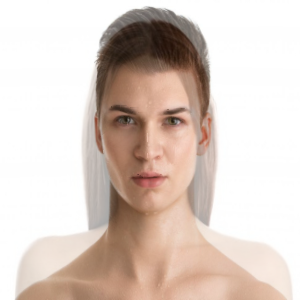

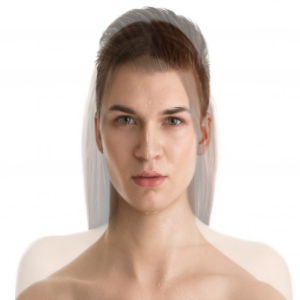

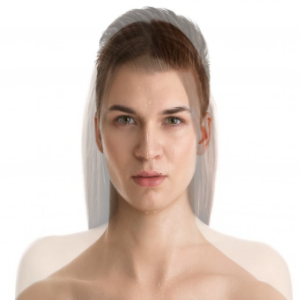

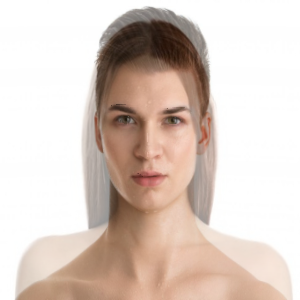

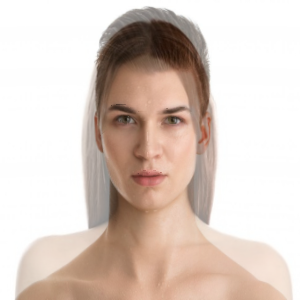

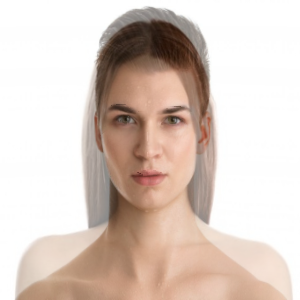

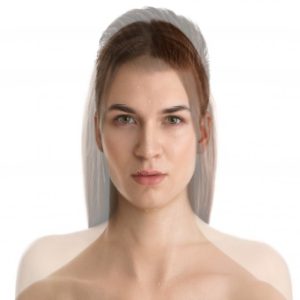

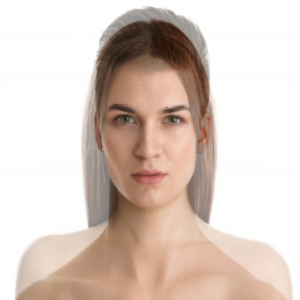

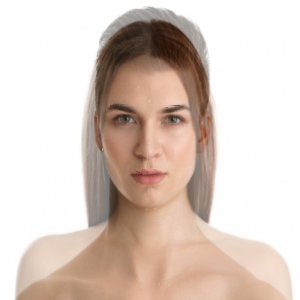

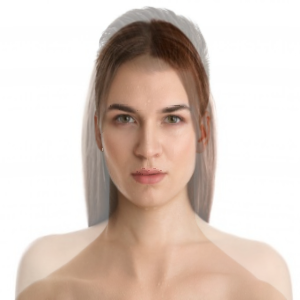

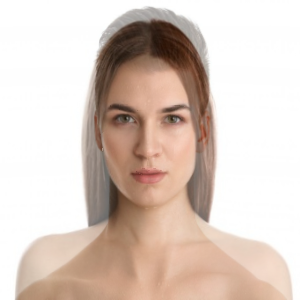

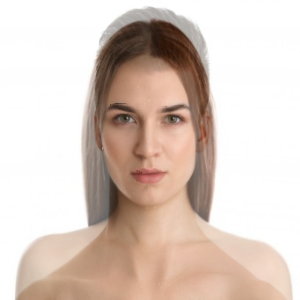

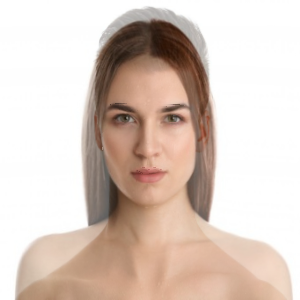

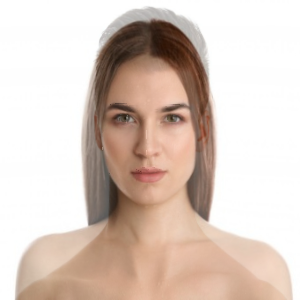

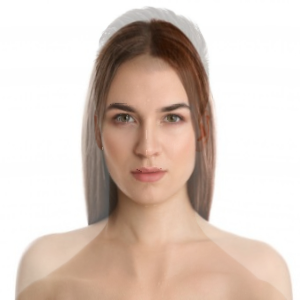

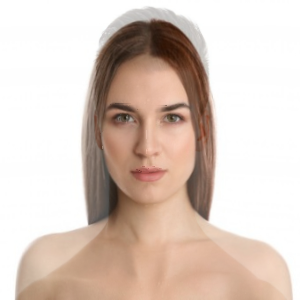

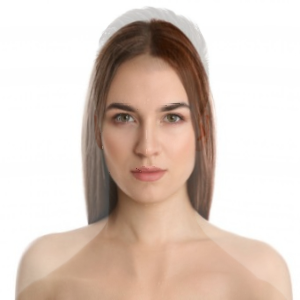

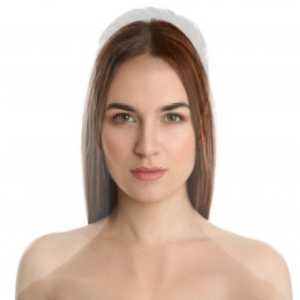

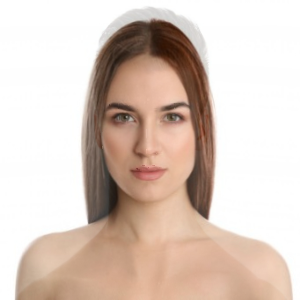

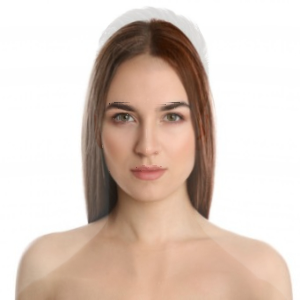

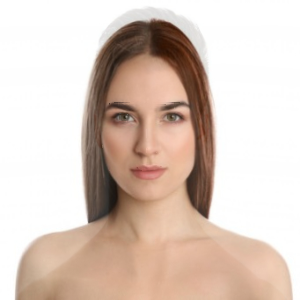

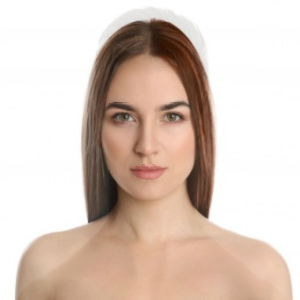

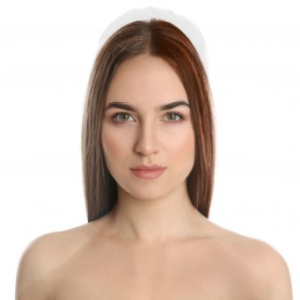

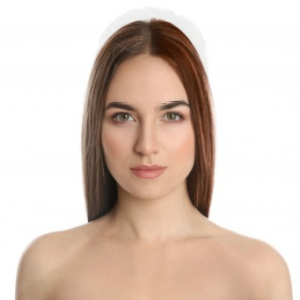

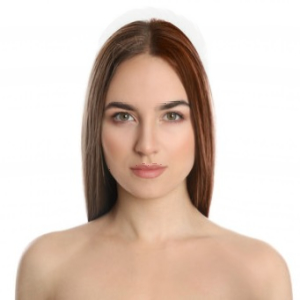

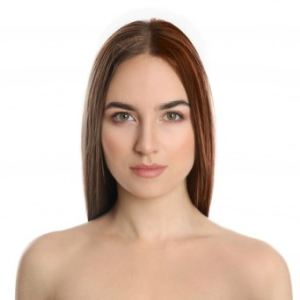

In [ ]:
size = (img1.shape[0],img1.shape[1])      #getting size of input image
i_image_list = calculate_i_images(img1,img2,points_img1,points_img2,triangles_img1) #getting list of intermediate images


In [ ]:
#generating gif image from list of intermediate images
import glob
from PIL import Image

frames = []
for i in range(len(i_image_list)):
  image_rgb = cv2.cvtColor(i_image_list[i], cv2.COLOR_BGR2RGB)
  frames.append(Image.fromarray(image_rgb))

frame_one = frames[0]
frame_one.save("DelaunayPoints.gif", format="GIF", append_images=frames,save_all=True, duration=100, loop=0)